### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [10]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

ingresos_totales = {nombre: df["Precio"].sum() for nombre, df in tiendas.items()}

In [11]:
df_ingresos = pd.DataFrame(
    ingresos_totales.items(),
    columns=["Tienda", "Ingreso Total"]
).sort_values("Ingreso Total", ascending=False)

df_ingresos

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [12]:
tienda["Precio"].dtype


dtype('float64')

# 2. Ventas por categoría

## calcular la cantidad de productos vendidos por categoría en cada tienda.

Agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [15]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

top_n = 5

top5_por_tienda = {}

for nombre, df in tiendas.items():
    top5 = (
        df.groupby("Categoría del Producto")
          .size()
          .sort_values(ascending=False)
          .head(top_n)
          .reset_index(name="Cantidad de ventas")
    )
    top5_por_tienda[nombre] = top5

    print(f"\n {nombre} — Top {top_n} categorías más vendidas")
    display(top5)


 Tienda 1 — Top 5 categorías más vendidas


,Categoría del Producto,Cantidad de ventas
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284



 Tienda 2 — Top 5 categorías más vendidas


,Categoría del Producto,Cantidad de ventas
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275



 Tienda 3 — Top 5 categorías más vendidas


,Categoría del Producto,Cantidad de ventas
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277



 Tienda 4 — Top 5 categorías más vendidas


,Categoría del Producto,Cantidad de ventas
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254


# 3. Calificación promedio de la tienda


##  calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [19]:
promedios = {
    nombre: pd.to_numeric(df["Calificación"], errors="coerce").mean()
    for nombre, df in tiendas.items()
}

df_calificaciones = (
    pd.DataFrame(promedios.items(), columns=["Tienda", "Calificación promedio"])
      .sort_values("Calificación promedio", ascending=False)
      .reset_index(drop=True)
)

df_calificaciones

,Tienda,Calificación promedio
0,Tienda 3,4.048326
1,Tienda 2,4.037304
2,Tienda 4,3.995759
3,Tienda 1,3.976685


In [21]:
mejor_tienda, mejor_promedio = max(promedios.items(), key=lambda x: x[1])
print(f"La tienda con mejor promedio es {mejor_tienda} con un promedio de {mejor_promedio:.2f}")

La tienda con mejor promedio es Tienda 3 con un promedio de 4.05


# 4. Productos más y menos vendidos

## identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [31]:
resultados_mas = []
resultados_menos = []

for nombre, df in tiendas.items():
    conteo = df["Producto"].value_counts()

    mas_vendidos = conteo.head(3).reset_index()
    mas_vendidos.columns = ["Producto", "Ventas"]
    mas_vendidos["Tienda"] = nombre

    menos_vendidos = conteo.tail(3).sort_values().reset_index()
    menos_vendidos.columns = ["Producto", "Ventas"]
    menos_vendidos["Tienda"] = nombre

    resultados_mas.append(mas_vendidos)
    resultados_menos.append(menos_vendidos)

df_mas_vendidos = pd.concat(resultados_mas, ignore_index=True)[["Tienda", "Producto", "Ventas"]]
df_menos_vendidos = pd.concat(resultados_menos, ignore_index=True)[["Tienda", "Producto", "Ventas"]]


for nombre in tiendas.keys():
    print(f"\n {nombre} — TOP 3 Más vendidos")
    display(df_mas_vendidos[df_mas_vendidos["Tienda"] == nombre]
            .sort_values("Ventas", ascending=False)
            .reset_index(drop=True))

    print(f"\n {nombre} — TOP 3 Menos vendidos")
    display(df_menos_vendidos[df_menos_vendidos["Tienda"] == nombre]
            .sort_values("Ventas", ascending=True)
            .reset_index(drop=True))


 Tienda 1 — TOP 3 Más vendidos


,Tienda,Producto,Ventas
0,Tienda 1,Microondas,60
1,Tienda 1,TV LED UHD 4K,60
2,Tienda 1,Armario,60



 Tienda 1 — TOP 3 Menos vendidos


,Tienda,Producto,Ventas
0,Tienda 1,Auriculares con micrófono,33
1,Tienda 1,Celular ABXY,33
2,Tienda 1,Olla de presión,35



 Tienda 2 — TOP 3 Más vendidos


,Tienda,Producto,Ventas
0,Tienda 2,Iniciando en programación,65
1,Tienda 2,Microondas,62
2,Tienda 2,Batería,61



 Tienda 2 — TOP 3 Menos vendidos


,Tienda,Producto,Ventas
0,Tienda 2,Juego de mesa,32
1,Tienda 2,Mesa de comedor,34
2,Tienda 2,Impresora,34



 Tienda 3 — TOP 3 Más vendidos


,Tienda,Producto,Ventas
0,Tienda 3,Kit de bancas,57
1,Tienda 3,Mesa de comedor,56
2,Tienda 3,Cama king,56



 Tienda 3 — TOP 3 Menos vendidos


,Tienda,Producto,Ventas
0,Tienda 3,Bloques de construcción,35
1,Tienda 3,Mochila,36
2,Tienda 3,Microondas,36



 Tienda 4 — TOP 3 Más vendidos


,Tienda,Producto,Ventas
0,Tienda 4,Cama box,62
1,Tienda 4,Cubertería,59
2,Tienda 4,Dashboards con Power BI,56



 Tienda 4 — TOP 3 Menos vendidos


,Tienda,Producto,Ventas
0,Tienda 4,Guitarra eléctrica,33
1,Tienda 4,Armario,34
2,Tienda 4,Guitarra acústica,37


# 5. Envío promedio por tienda

## calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [32]:
costo_envio_promedio = {
    nombre: pd.to_numeric(df["Costo de envío"], errors="coerce").mean()
    for nombre, df in tiendas.items()
}

df_envio_promedio = (
    pd.DataFrame(costo_envio_promedio.items(), columns=["Tienda", "Costo de envío promedio"])
      .sort_values("Costo de envío promedio", ascending=False)
      .reset_index(drop=True)
)

df_envio_promedio["Costo de envío promedio"] = df_envio_promedio["Costo de envío promedio"].round(2)
df_envio_promedio

,Tienda,Costo de envío promedio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


# Visualización

## Ingresos por tienda

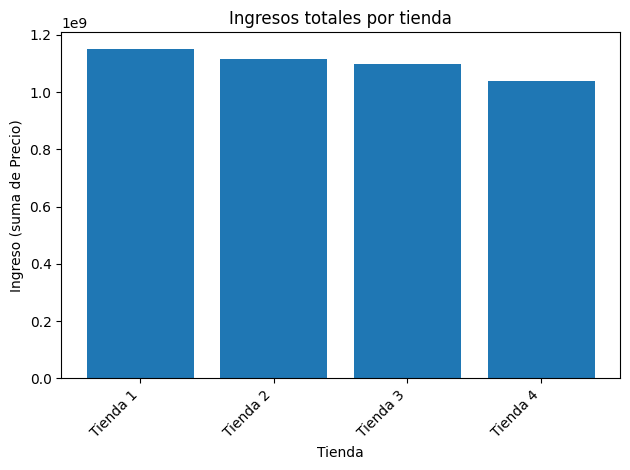

In [33]:
import matplotlib.pyplot as plt

ingresos = {n: pd.to_numeric(df["Precio"], errors="coerce").sum() for n, df in tiendas.items()}
df_ingresos = pd.DataFrame(ingresos.items(), columns=["Tienda", "Ingreso"]).sort_values("Ingreso", ascending=False)

plt.figure()
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso"])
plt.title("Ingresos totales por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso (suma de Precio)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Top 5 categorías más vendidas por tienda

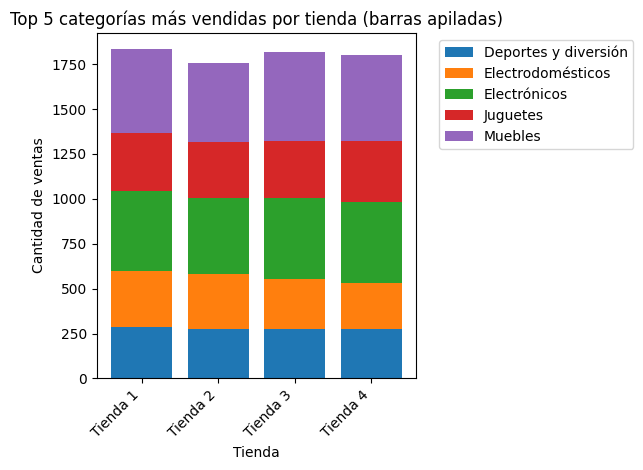

In [34]:
df_todas = pd.concat([df.assign(Tienda=n) for n, df in tiendas.items()], ignore_index=True)

top5_por_tienda = (
    df_todas.groupby(["Tienda", "Categoría del Producto"])
            .size()
            .reset_index(name="Ventas")
)

top5_por_tienda["rank"] = top5_por_tienda.groupby("Tienda")["Ventas"].rank(method="first", ascending=False)
top5_por_tienda = top5_por_tienda[top5_por_tienda["rank"] <= 5].drop(columns="rank")

pivot_top5 = top5_por_tienda.pivot(index="Tienda", columns="Categoría del Producto", values="Ventas").fillna(0)

plt.figure()
plt.bar(pivot_top5.index, pivot_top5.iloc[:, 0])
bottom = pivot_top5.iloc[:, 0].copy()

for col in pivot_top5.columns[1:]:
    plt.bar(pivot_top5.index, pivot_top5[col], bottom=bottom)
    bottom += pivot_top5[col]

plt.title("Top 5 categorías más vendidas por tienda (barras apiladas)")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")
plt.legend(pivot_top5.columns, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Satisfacción vs costo de envío

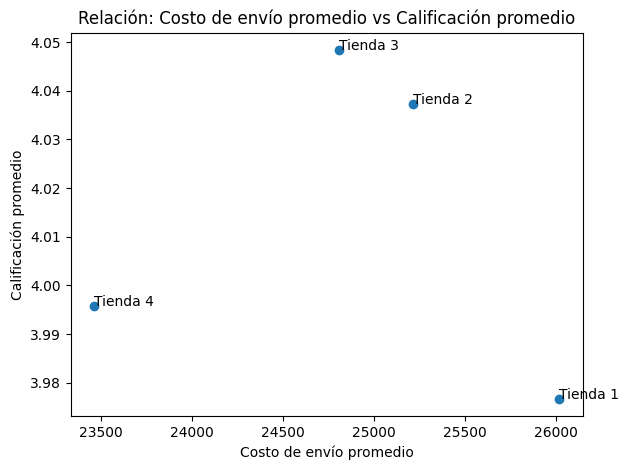

In [35]:
prom_calif = {n: pd.to_numeric(df["Calificación"], errors="coerce").mean() for n, df in tiendas.items()}
prom_envio = {n: pd.to_numeric(df["Costo de envío"], errors="coerce").mean() for n, df in tiendas.items()}

df_scatter = pd.DataFrame({
    "Tienda": list(tiendas.keys()),
    "Calificación promedio": [prom_calif[n] for n in tiendas.keys()],
    "Envío promedio": [prom_envio[n] for n in tiendas.keys()],
})

plt.figure()
plt.scatter(df_scatter["Envío promedio"], df_scatter["Calificación promedio"])
plt.title("Relación: Costo de envío promedio vs Calificación promedio")
plt.xlabel("Costo de envío promedio")
plt.ylabel("Calificación promedio")

for _, row in df_scatter.iterrows():
    plt.text(row["Envío promedio"], row["Calificación promedio"], row["Tienda"])

plt.tight_layout()
plt.show()

## Productos más vendidos por tienda

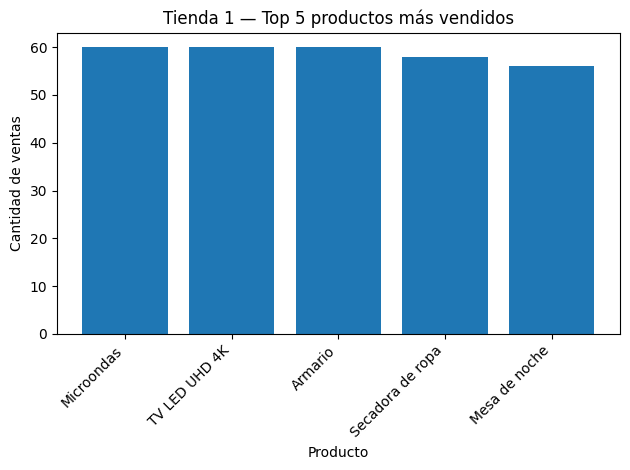

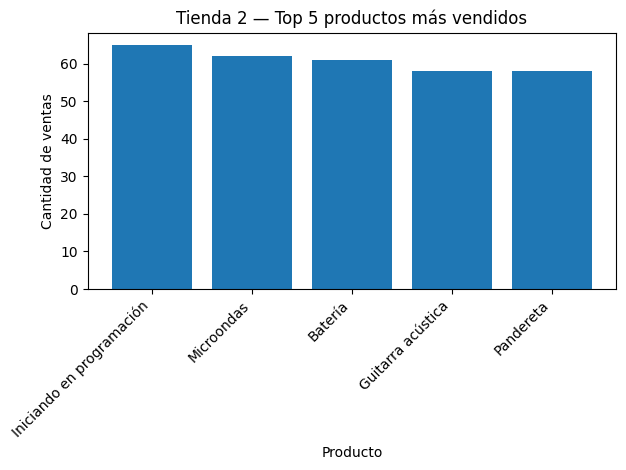

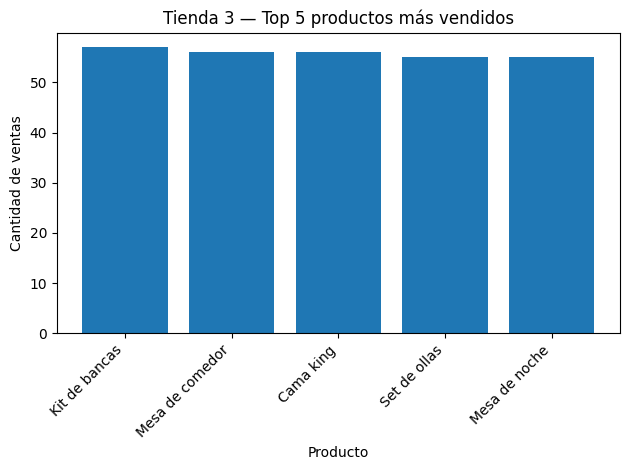

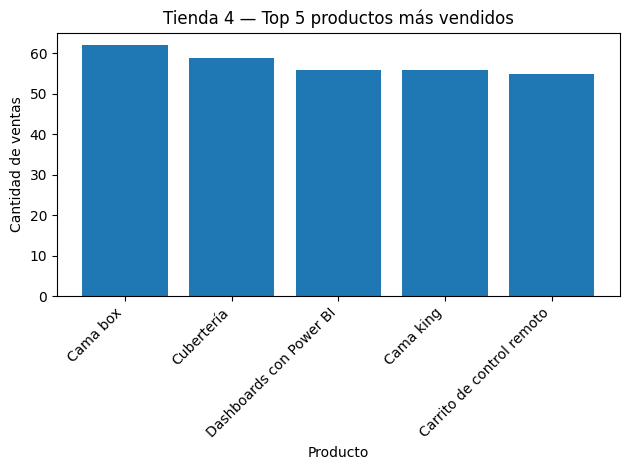

In [37]:
top_n = 5

for nombre, df in tiendas.items():
    top_productos = df["Producto"].value_counts().head(top_n)

    plt.figure()
    plt.bar(top_productos.index, top_productos.values)
    plt.title(f"{nombre} — Top {top_n} productos más vendidos")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad de ventas")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Informe

Informe final: recomendación de tienda para vender


1) Introducción

El propósito de este análisis fue determinar cuál de las cuatro tiendas es la más conveniente para vender, tomando en cuenta tanto el desempeño comercial como la experiencia del cliente. Para ello se evaluaron los siguientes factores: ingresos totales, productos/categorías más y menos vendidos, calificación promedio de clientes, productos destacados y costo de envío promedio (considerando que el envío lo paga el cliente). Además, se generaron gráficos para comparar tiendas y facilitar la interpretación de patrones.


2) Desarrollo del análisis

2.1 Ingresos totales por tienda (rendimiento comercial)

Los ingresos se calcularon sumando la columna Precio en cada tienda. Los resultados fueron:

Tienda 1: 1.150.880.000

Tienda 2: 1.116.344.000

Tienda 3: 1.098.020.000

Tienda 4: 1.038.376.000

Lectura clave: La Tienda 4 es la que presenta menor ingreso total, quedando por debajo del resto de forma consistente. El gráfico de barras de ingresos refuerza esta diferencia.


2.2 Categorías / líneas de productos más relevantes (demanda)

A partir de los productos más vendidos por tienda, se observa el “perfil” de demanda dominante:

Tienda 1 (más vendidos): Microondas, TV LED UHD 4K, Armario, Secadora de ropa, Mesa de noche

Predominan electrodomésticos/electrónica y hogar/muebles.

Tienda 2 (más vendidos): Iniciando en programación, Microondas, Batería, Guitarra acústica, Pandereta

Mezcla de educación/tecnología, electrodomésticos y música/instrumentos.

Tienda 3 (más vendidos): Kit de bancas, Mesa de comedor, Cama king, Set de ollas, Mesa de noche

Enfoque fuerte en muebles/hogar.

Tienda 4 (más vendidos): Cama box, Cubertería, Dashboards con Power BI, Cama king, Carrito de control remoto

Mezcla de hogar, educación/tecnología y juguetes.

Lectura clave: Todas las tiendas tienen productos “estrella”, pero en la Tienda 4 el portafolio más vendido se ve más disperso (hogar + curso + juguete), lo que suele asociarse a menor tracción sostenida en una línea principal (esto se complementa con su menor ingreso total).


2.3 Calificación promedio por tienda (satisfacción del cliente)

Se calculó el promedio de Calificación por tienda:

Tienda 3: 4,05

Tienda 2: 4,04

Tienda 4: 4,00

Tienda 1: 3,98

Lectura clave: La mejor satisfacción es la Tienda 3, y la más baja es la Tienda 1. Aun así, las diferencias no son extremas (todas rondan ~4), lo cual sugiere experiencia relativamente buena en general.


2.4 Productos más y menos vendidos (tracción y rotación)

Se identificaron los productos más vendidos y los menos vendidos por tienda.

Uso del insight:

Los más vendidos muestran lo que impulsa las ventas reales (demanda concreta).

Los menos vendidos pueden indicar baja rotación o productos con poca aceptación.

Tu tabla separada (Más vendidos / Menos vendidos) permite ver con claridad qué productos destacan y cuáles podrían ser “lastre” por baja salida.


2.5 Costo de envío promedio por tienda (fricción de compra)

Se calculó el promedio de Costo de envío:

Tienda 1: 26.018,61

Tienda 2: 25.216,24

Tienda 3: 24.805,68

Tienda 4: 23.459,46

Lectura clave: La Tienda 4 tiene el envío promedio más bajo, lo cual es positivo porque el cliente paga el envío (menor fricción). Sin embargo, este beneficio no compensa su menor ingreso total.


3) Conclusión y recomendación

Recomendación: el Sr. Juan debería vender la Tienda 4.

Justificación (basada en los indicadores):

Menor ingreso total (factor principal): la Tienda 4 es la que menos factura (1.038.376.000), por lo que su potencial comercial global es inferior frente a las demás.

Satisfacción no es diferencial: su calificación promedio (≈ 4,00) es correcta, pero no lidera (Tienda 3 y Tienda 2 son mejores).

Envío bajo ayuda, pero no revierte el desempeño: aunque tiene el costo de envío promedio más bajo (23.459,46), ese punto fuerte no se traduce en mayores ingresos.

Portafolio más vendido más disperso: sus “top productos” combinan hogar + curso + juguete, lo que sugiere que no tiene una línea dominante tan sólida como Tienda 3 (hogar/muebles) o Tienda 1 (electrodomésticos/electrónica), y esto se refleja en la facturación.


Resumen final:

La Tienda 4 muestra una ventaja en costos de envío, pero en el balance general queda última en ingresos y no lidera en satisfacción, por lo que es la opción más razonable para vender si el objetivo es conservar las tiendas con mejor desempeño y mayor potencial

# Extra

## Preparando el espacio de trabajo

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_geo = pd.concat([df.assign(Tienda=nombre) for nombre, df in tiendas.items()], ignore_index=True)

df_geo["lat"] = pd.to_numeric(df_geo["lat"], errors="coerce")
df_geo["lon"] = pd.to_numeric(df_geo["lon"], errors="coerce")
df_geo["Precio"] = pd.to_numeric(df_geo["Precio"], errors="coerce")
df_geo["Calificación"] = pd.to_numeric(df_geo["Calificación"], errors="coerce")

df_geo = df_geo.dropna(subset=["lat", "lon"]).copy()

df_geo[["Tienda","lat","lon","Precio","Calificación"]].head()

,Tienda,lat,lon,Precio,Calificación
0,Tienda 1,4.60971,-74.08175,164300.0,4
1,Tienda 1,6.25184,-75.56359,192300.0,1
2,Tienda 1,10.39972,-75.51444,209600.0,1
3,Tienda 1,3.43722,-76.52250,757500.0,4
4,Tienda 1,6.25184,-75.56359,335200.0,5


## Distribución geográfica de ventas por tienda

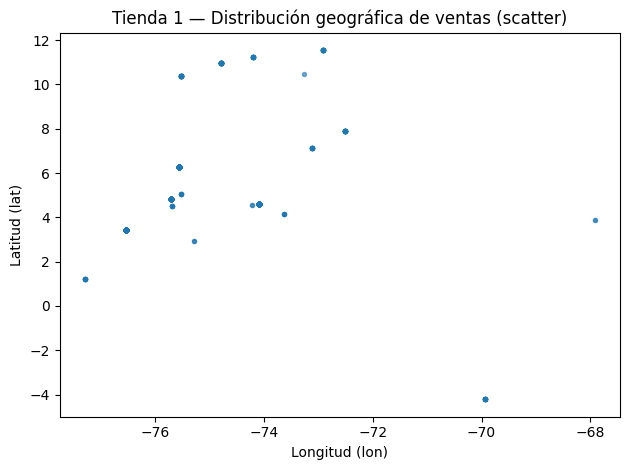

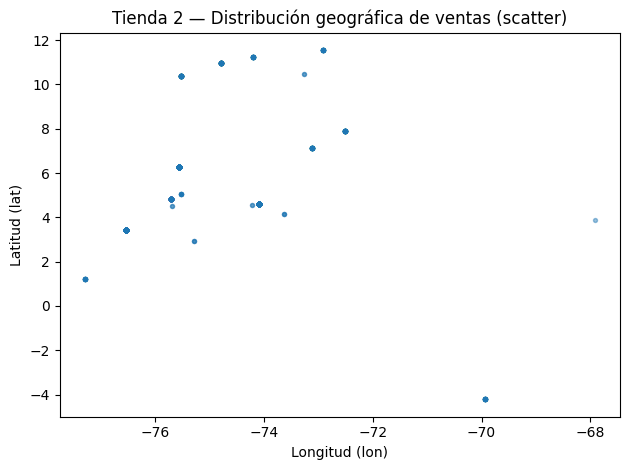

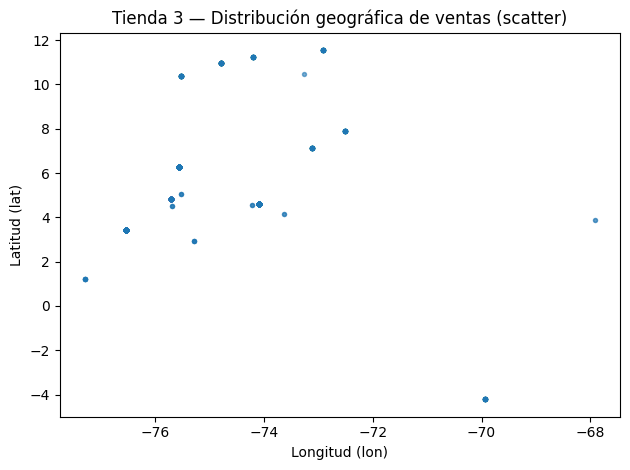

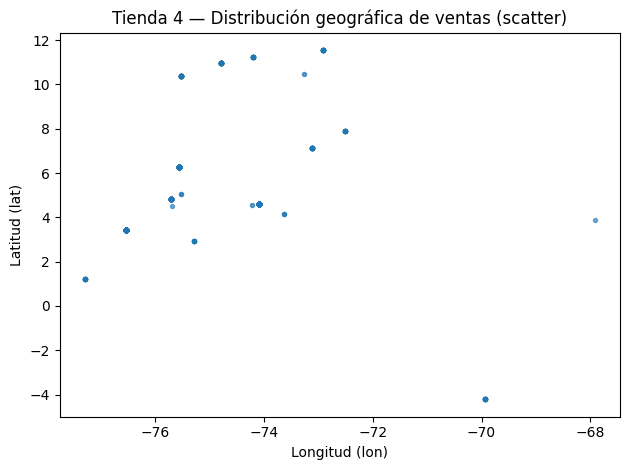

In [42]:
for nombre in df_geo["Tienda"].unique():
    d = df_geo[df_geo["Tienda"] == nombre]

    plt.figure()
    plt.scatter(d["lon"], d["lat"], alpha=0.25, s=8)
    plt.title(f"{nombre} — Distribución geográfica de ventas (scatter)")
    plt.xlabel("Longitud (lon)")
    plt.ylabel("Latitud (lat)")
    plt.tight_layout()
    plt.show()

## Mapa de calor

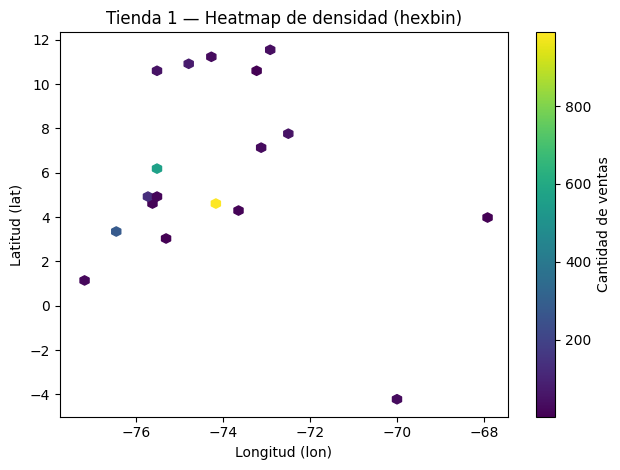

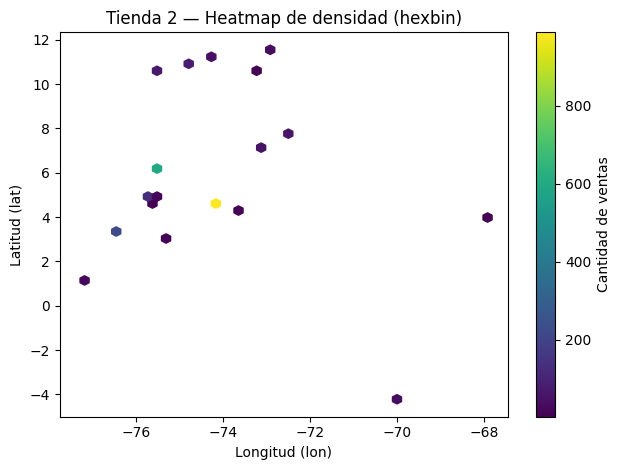

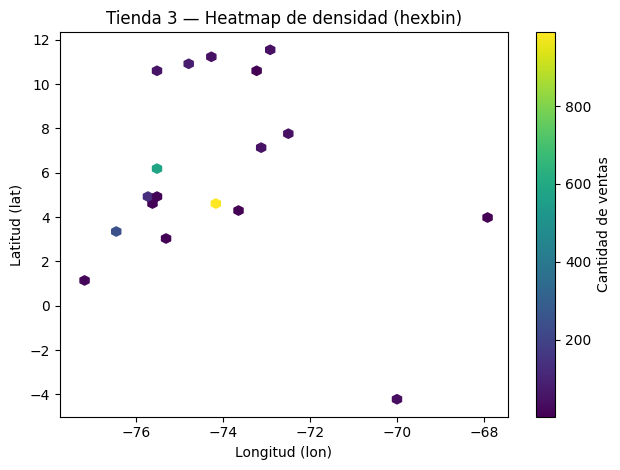

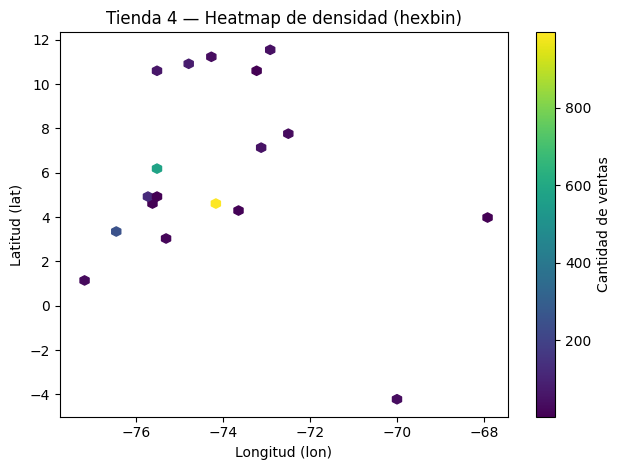

In [43]:
for nombre in df_geo["Tienda"].unique():
    d = df_geo[df_geo["Tienda"] == nombre]

    plt.figure()
    plt.hexbin(d["lon"], d["lat"], gridsize=45, mincnt=1)
    plt.title(f"{nombre} — Heatmap de densidad (hexbin)")
    plt.xlabel("Longitud (lon)")
    plt.ylabel("Latitud (lat)")
    plt.colorbar(label="Cantidad de ventas")
    plt.tight_layout()
    plt.show()

## Mapa Interactivo

In [44]:
!pip -q install folium

import folium
from folium.plugins import HeatMap

center = [df_geo["lat"].mean(), df_geo["lon"].mean()]
m = folium.Map(location=center, zoom_start=4)

heat_data = df_geo[["lat","lon"]].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(m)

m

## Análisis por región

### Grilla y métricas por tienda-zona

In [47]:
cell = 0.5

df_geo["lat_bin"] = (df_geo["lat"] / cell).round() * cell
df_geo["lon_bin"] = (df_geo["lon"] / cell).round() * cell

resumen_zona = (
    df_geo.groupby(["Tienda","lat_bin","lon_bin"])
          .agg(ventas=("Producto","size"),
               ingreso=("Precio","sum"),
               calif_prom=("Calificación","mean"))
          .reset_index()
)

resumen_zona.sort_values("ventas", ascending=False).head(10)


,Tienda,lat_bin,lon_bin,ventas,ingreso,calif_prom
58,Tienda 4,4.5,-74.0,995,422481000.0,4.070352
24,Tienda 2,4.5,-74.0,989,482199900.0,4.128413
7,Tienda 1,4.5,-74.0,989,444131000.0,4.092012
41,Tienda 3,4.5,-74.0,989,478364100.0,4.159757
26,Tienda 2,6.5,-75.5,594,297246700.0,3.919192
43,Tienda 3,6.5,-75.5,580,250580600.0,4.001724
60,Tienda 4,6.5,-75.5,577,251983800.0,3.916811
9,Tienda 1,6.5,-75.5,563,296858100.0,3.866785
3,Tienda 1,3.5,-76.5,283,154493700.0,3.985866
54,Tienda 4,3.5,-76.5,254,124487200.0,3.925197


### Zonas “hotspot” por tienda

In [48]:
for nombre in resumen_zona["Tienda"].unique():
    top_zonas = (resumen_zona[resumen_zona["Tienda"]==nombre]
                 .sort_values("ventas", ascending=False)
                 .head(10))
    print(f"\n {nombre} — Top 10 zonas por concentración de ventas")
    display(top_zonas)


 Tienda 1 — Top 10 zonas por concentración de ventas


,Tienda,lat_bin,lon_bin,ventas,ingreso,calif_prom
7,Tienda 1,4.5,-74.0,989,444131000.0,4.092012
9,Tienda 1,6.5,-75.5,563,296858100.0,3.866785
3,Tienda 1,3.5,-76.5,283,154493700.0,3.985866
8,Tienda 1,5.0,-75.5,148,64241900.0,3.932432
14,Tienda 1,11.0,-75.0,75,32907700.0,3.573333
12,Tienda 1,10.5,-75.5,53,22296700.0,4.037736
11,Tienda 1,8.0,-72.5,51,37879500.0,3.882353
16,Tienda 1,11.5,-73.0,40,18512700.0,3.450000
0,Tienda 1,-4.0,-70.0,32,14669800.0,4.156250
15,Tienda 1,11.0,-74.0,32,13198300.0,3.750000



 Tienda 2 — Top 10 zonas por concentración de ventas


,Tienda,lat_bin,lon_bin,ventas,ingreso,calif_prom
24,Tienda 2,4.5,-74.0,989,482199900.0,4.128413
26,Tienda 2,6.5,-75.5,594,297246700.0,3.919192
20,Tienda 2,3.5,-76.5,222,118257600.0,4.252252
25,Tienda 2,5.0,-75.5,141,46613700.0,3.936170
31,Tienda 2,11.0,-75.0,78,27741300.0,3.717949
29,Tienda 2,10.5,-75.5,70,21548300.0,4.028571
28,Tienda 2,8.0,-72.5,59,28991500.0,3.983051
27,Tienda 2,7.0,-73.0,50,23895600.0,3.580000
32,Tienda 2,11.0,-74.0,40,13829300.0,3.650000
33,Tienda 2,11.5,-73.0,35,12656400.0,4.285714



 Tienda 3 — Top 10 zonas por concentración de ventas


,Tienda,lat_bin,lon_bin,ventas,ingreso,calif_prom
41,Tienda 3,4.5,-74.0,989,478364100.0,4.159757
43,Tienda 3,6.5,-75.5,580,250580600.0,4.001724
37,Tienda 3,3.5,-76.5,248,109287600.0,4.056452
42,Tienda 3,5.0,-75.5,141,69006300.0,4.007092
48,Tienda 3,11.0,-75.0,77,36768500.0,4.025974
46,Tienda 3,10.5,-75.5,56,34144100.0,3.910714
44,Tienda 3,7.0,-73.0,50,23538900.0,4.040000
50,Tienda 3,11.5,-73.0,44,19025900.0,3.772727
45,Tienda 3,8.0,-72.5,44,25165500.0,3.909091
49,Tienda 3,11.0,-74.0,44,12854300.0,3.477273



 Tienda 4 — Top 10 zonas por concentración de ventas


,Tienda,lat_bin,lon_bin,ventas,ingreso,calif_prom
58,Tienda 4,4.5,-74.0,995,422481000.0,4.070352
60,Tienda 4,6.5,-75.5,577,251983800.0,3.916811
54,Tienda 4,3.5,-76.5,254,124487200.0,3.925197
59,Tienda 4,5.0,-75.5,128,65433300.0,4.078125
65,Tienda 4,11.0,-75.0,80,34623000.0,3.887500
63,Tienda 4,10.5,-75.5,63,24387600.0,4.095238
61,Tienda 4,7.0,-73.0,50,25559600.0,4.060000
67,Tienda 4,11.5,-73.0,44,23684700.0,4.113636
51,Tienda 4,-4.0,-70.0,35,17108300.0,3.828571
66,Tienda 4,11.0,-74.0,35,13218600.0,3.542857


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
